In [ ]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

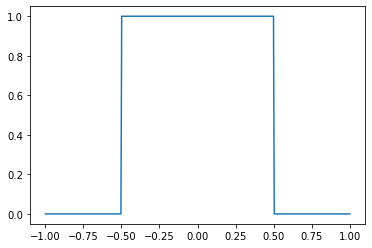

0.1549994945526123


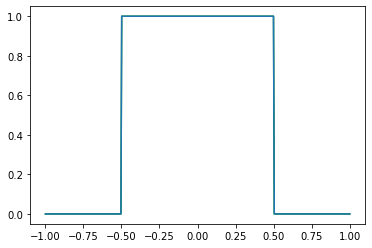

time:  0.0


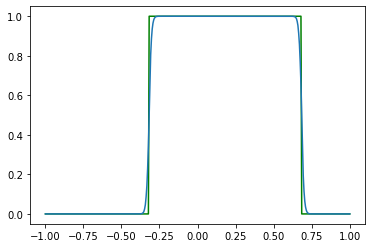

time:  0.18181818181818182


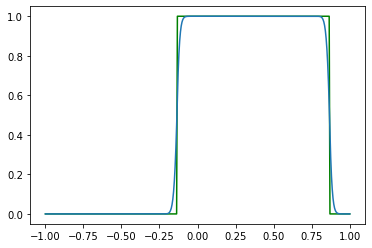

time:  0.36363636363636365


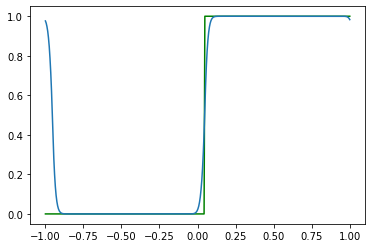

time:  0.5454545454545454


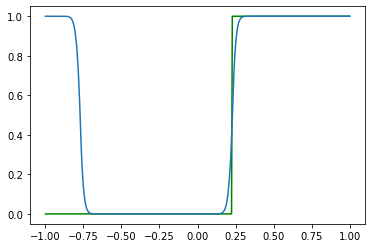

time:  0.7272727272727273


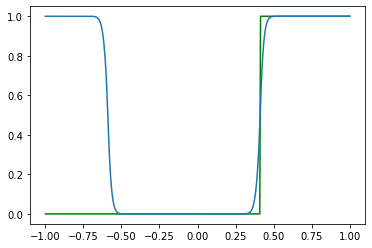

time:  0.9090909090909091


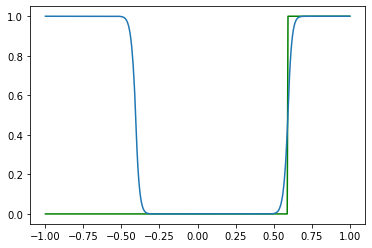

time:  1.0909090909090908


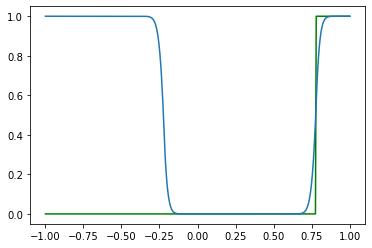

time:  1.2727272727272727


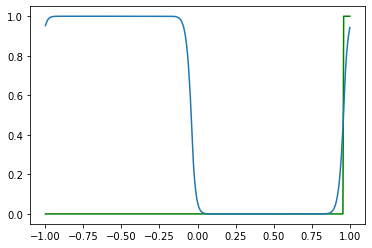

time:  1.4545454545454546


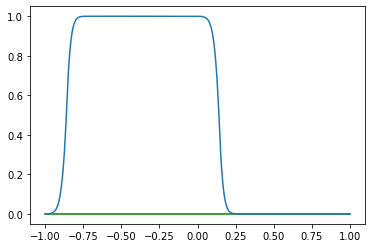

time:  1.6363636363636362


In [1]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline

N = 400
xmax = 1

# .   _  .   _  .  _  .  _  .
# x0 xc0 x1 xc1
x = np.linspace(-1., 1., N+1)
N_t = 100
t = np.linspace(0, 1.8, N_t)

# defines interfaces grid
xc = 1/2*np.array(x[0:-1]+x[1:])

dx = x[1] - x[0]

# define initial data
half_width = 0.5
height = 1

# u0 array defined on domain xc
u0 = height*(1 - np.heaviside(np.abs(xc) - half_width, 0))

# plot initial data
plt.plot(xc, u0)
plt.show()

start = time.time()  

def analytic_sol(x, t):
  v = 1 # velocity of square wave
  return height*(np.heaviside(xc - v*t + half_width, 0) - np.heaviside(xc - v*t - half_width, 0))

def minmod(a, b):
  # ([1, 2] < [3, 1]) = [True, False]
  # [True, False].astype(int) = [1, 0]
  # See also KT Paper Eq. (2.4) and below
  minmod = (np.abs(a) < np.abs(b)).astype(int)
  minmod2 = (np.abs(b) < np.abs(a)).astype(int)
  return 1/2*(np.sign(a) + np.sign(b))*(minmod*np.abs(a) + minmod2*np.abs(b)) 
  
def dudt(t, u):
  u = np.append(u[-1], np.append(u, u[0])) # periodic boundary conditions
  
  # xc = [1, 2, 3, 4, 5, 6]
  # xc[1:-1] = [2, 3, 4, 5]
  # xc[0:-2] = [1, 2, 3, 4]
  # xc[1:-1] - xc[0:-2] = [1, 1, 1, 1]
  limiter = minmod((u[1:-1] - u[0:-2])/dx, (u[2:] - u[1:-1])/dx)
  uLForw = u[0]
  uLCent = u[1:-1] + dx/2*limiter
  uL = np.append(uLForw, uLCent)
  
  uRBack = u[-1]
  uRCent = u[1:-1] - dx/2*limiter
  uR = np.append(uRCent, uRBack)

  # Flux
  FL = uL
  FR = uR
 
  # characteristic velocity
  # np.ones(3) = [1, 1, 1]
  FL_d = np.ones(N+1)
  FR_d = FL_d
  
  prop = (np.abs(FL_d) >= np.abs(FR_d)).astype(int)*np.abs(FL_d) + (np.abs(FL_d) < np.abs(FR_d)).astype(int)*np.abs(FR_d)
    
  fu_interface = (FL + FR)/2 - prop/2*(uR - uL)

  dudt = (fu_interface[:-1] - fu_interface[1:])/dx
  #print(dudt.shape)
  return dudt # dudt.shape = N dimensional array
  
def solution(u0):
    """https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html"""
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='RK45') # explicit Runge Kutta
    return sol.y

sol = solution(u0) # shape = (N, N_t)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])
    
# print(sol[-1])

31.833420991897583


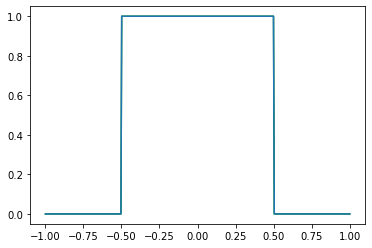

time:  0.0


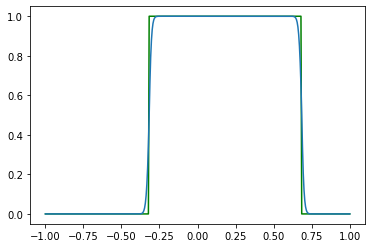

time:  0.18181818181818182


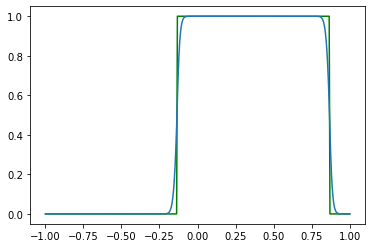

time:  0.36363636363636365


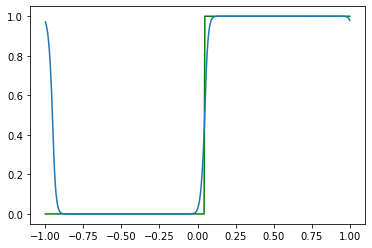

time:  0.5454545454545454


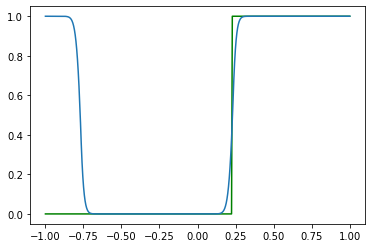

time:  0.7272727272727273


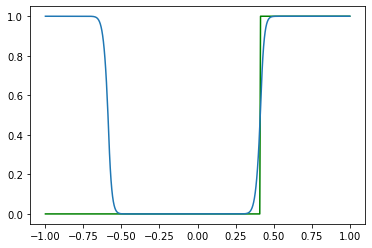

time:  0.9090909090909091


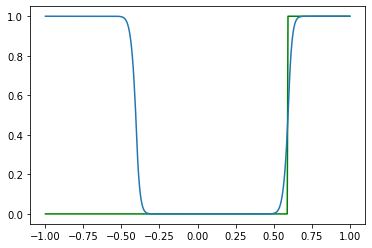

time:  1.0909090909090908


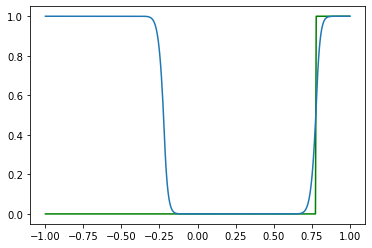

time:  1.2727272727272727


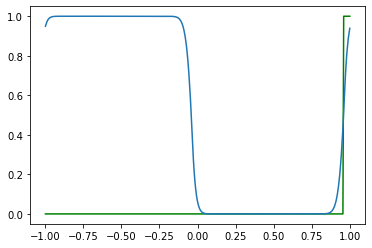

time:  1.4545454545454546


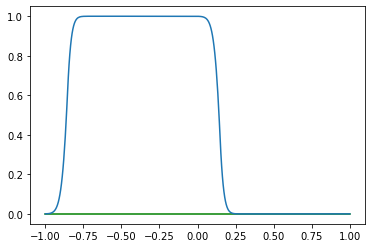

time:  1.6363636363636362


In [2]:
def solution2(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='Radau') # Implicit Runge Kutta
    return sol.y

sol = solution2(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])

41.88846468925476


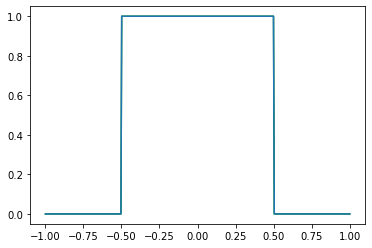

time:  0.0


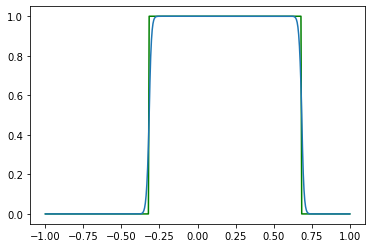

time:  0.18181818181818182


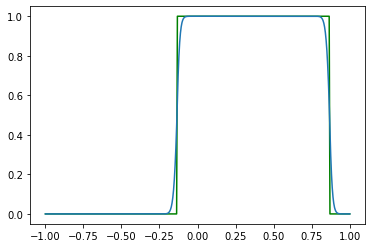

time:  0.36363636363636365


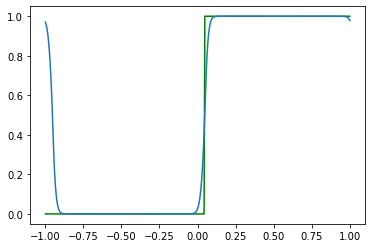

time:  0.5454545454545454


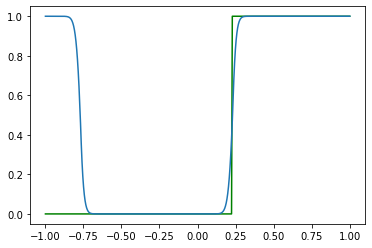

time:  0.7272727272727273


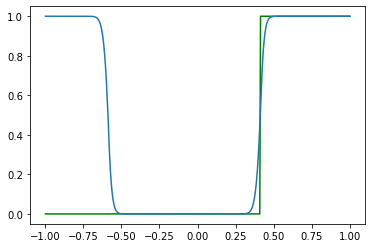

time:  0.9090909090909091


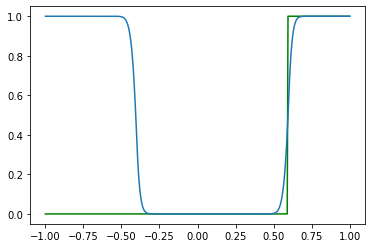

time:  1.0909090909090908


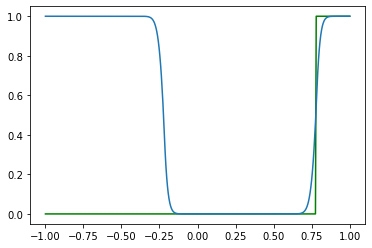

time:  1.2727272727272727


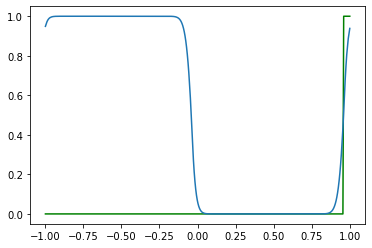

time:  1.4545454545454546


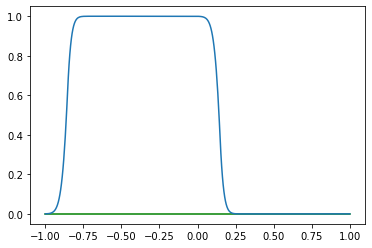

time:  1.6363636363636362


In [3]:
def solution3(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='BDF') # Implicit Euler(?)
    return sol.y

sol = solution3(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])